# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 2 - Tests Estadísticos**
---

In [1]:
# Tratamiento de los datos
# ========================
import numpy as np
import pandas as pd

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
# ============
import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

# Establecer preferencias de visualización
# ========================================
plt.rcParams["figure.figsize"] = (6,6)
pd.options.display.max_columns = None 

In [2]:
df = pd.read_csv("datos/soci_econ_country_profiles_resumido.csv", index_col = 0)
df.head(2)

,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock
country,,,,,,,,,,,,,,,,,,
Argentina,SouthAmerica,50.37,44271.0,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,112.887108,0.611,2.834056,91.749,24.9,15.4,4.8
Australia,Oceania,77.12,24451.0,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,115.686785,0.803,1.948647,85.904,19.0,21.0,28.2


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

1. ¿Qué diferencia existe el error de tipo I y el error de tipo II?


El de tipo I es que rechazamos la hipótesis nula, cuando es verdadera y el de tipo II ocurre cuando la hipótesis nula es falsa y no la rechazamos por falta de evidencia estadística para hacerlo. 

α es el  nivel de significancia que establecemos (habitualmente 0.05) y es la probabilidad de cometer un error de tipo I. α = 0.05 indica que aceptamos con una probabilidad del 5% estar rechazando la hipótesis nula (H0) siendo esta correcta. Para reducir el riesgo de cometer un error de tipo I se debe reducir el valor de α pero entonces tendremos menos probabilidad de detectar una diferencia si esta realmente existe.

β es la probabilidad de cometer un error de tipo II y depende de la potencia de la prueba (la capacidad para detectar si hay diferencia o efecto en nuestros datos). Podemos reducir el riesgo de cometer un error de tipo II aumentando la potencia estadística de nuestras pruebas estadísticas, para lo que habrá que aumentar el tamaño de la muestra (cantidad de datos de los que disponemos). 

   
2. ¿Qué es la asimetría?
   


La asimetria ocurre cuando la distribución de una variable no es simétrica, es decir, cuando tenemos gráficos sesgados a la derecha o a la izquierda, lo que supone que los valores no siguen una distribuición normal. 

Podemos tener 3 tipos de distribuciones en función de la simetría/asimetría de la misma:
- Distribuciones asimetricas positivas: la media es mayor que la mediana y la moda. Skew > 0. Distribución NO normal.
- Distribuciones asimetricas negativas: la media es menor que la mediana y la moda.	Skew < 0. Distribución NO normal.
- Distribuciones simetricas: la media es igual a la mediana y la moda. Skew = 0. Distribución normal.

3. ¿Es vuestra variable respuesta asimétrica?
   


In [3]:
# calculamos la asimetría de la variable respuesta
skew(df['restaurant_price_index'])

0.7736531033341337

In [4]:
# el mismo cálculo de otra manera
df['restaurant_price_index'].skew()

0.7917625282758816

Aunque hay una pequeña variación en el resultado según como apliquemos el método .skew() no es relevante ya que en ambos casos el valor es claramente mayor que 0, por lo que tenemos una distribución asimétrica positiva.

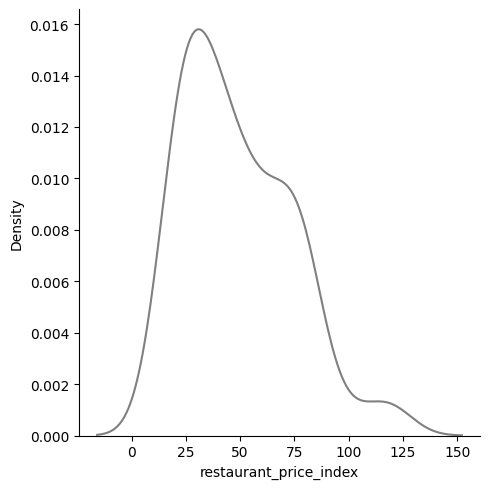

In [5]:
# densidad en tanto por uno de la variable respuesta
sns.displot(df['restaurant_price_index'], kind='kde', color = "grey");

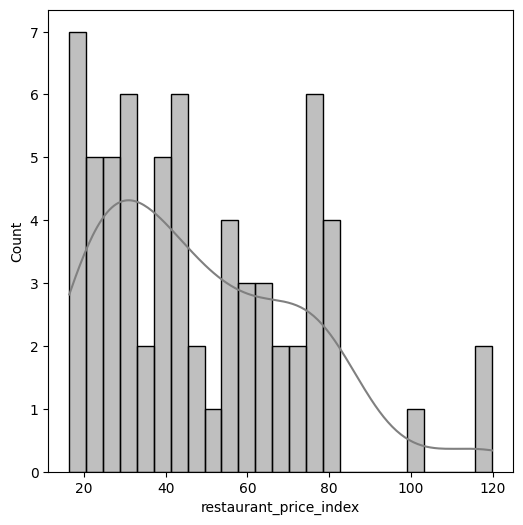

In [15]:
# histograma con la distribución de la variable respuesta
sns.histplot(df['restaurant_price_index'], kde = True, color = "grey", bins=25);

Gráficamente  podemos confirmar, tanto con el histplot como con el displot, que tenemos una distribución asimétrica, sesgada a la derecha. Por lo tanto los datos siguen una distribución NO normal.

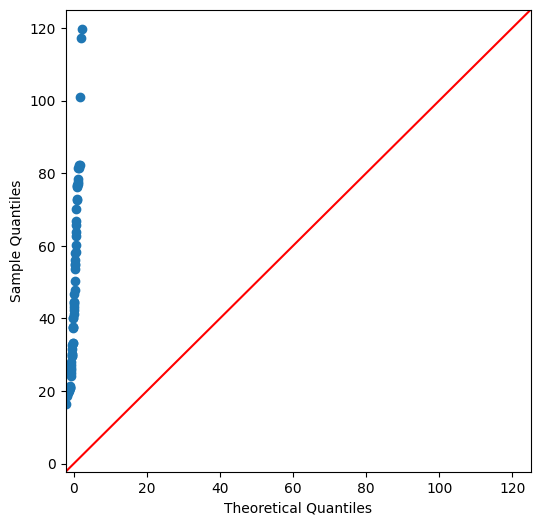

In [16]:
# qqplot de la variable respuesta
sm.qqplot(df['restaurant_price_index'], line ='45');

Con el qqplot podemos ver claramente que no es una distribución normal ya que los puntos están muy lejos de ajustarse a la línea

CONCLUSIÓN: Todas las observaciones coinciden: la variable respuesta 'restaurant_price_index' es asimétrica, distribución NO normal.

4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?
   


In [17]:
kurtosistest(df['restaurant_price_index'])

KurtosistestResult(statistic=0.4694704916932442, pvalue=0.6387333721800098)

El valor de la curtosis de la variable 'restaurant_price_index' es pvalue = 0.6387333721800098, o sea, mayor que cero. Es este caso tenemos una leptocurtosis, lo que coincide con la forma afilada que vemos en el displot.

5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

Usamos el test de Shapiro porque la muestra es muy pequeña, tan solo 66 registros.

In [18]:
# test de Saphiro
stats.shapiro(df['restaurant_price_index'])

ShapiroResult(statistic=0.9227616786956787, pvalue=0.0005270884139463305)

El histograma y distplot de la variable se presentan sesgados hacia la derecha y pvalue es menor que 0.05. Por lo tanto, de acuerdo con lo que sugieren los datos, la variable respuesta elegida, 'restaurant_price_index', no presenta distribuición normal.